<a href="https://colab.research.google.com/github/Lazuardi-hrp/Lazuardi-hrp.github.io/blob/main/YOLOv8_mold_bread_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

## Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 393, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="H8h5z8Miqwok3DUUAILH")
project = rf.workspace("muhammad-ghazi-zrswo").project("mold-p5mpx")
dataset = project.version(1).download("yolov8")

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/mold-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

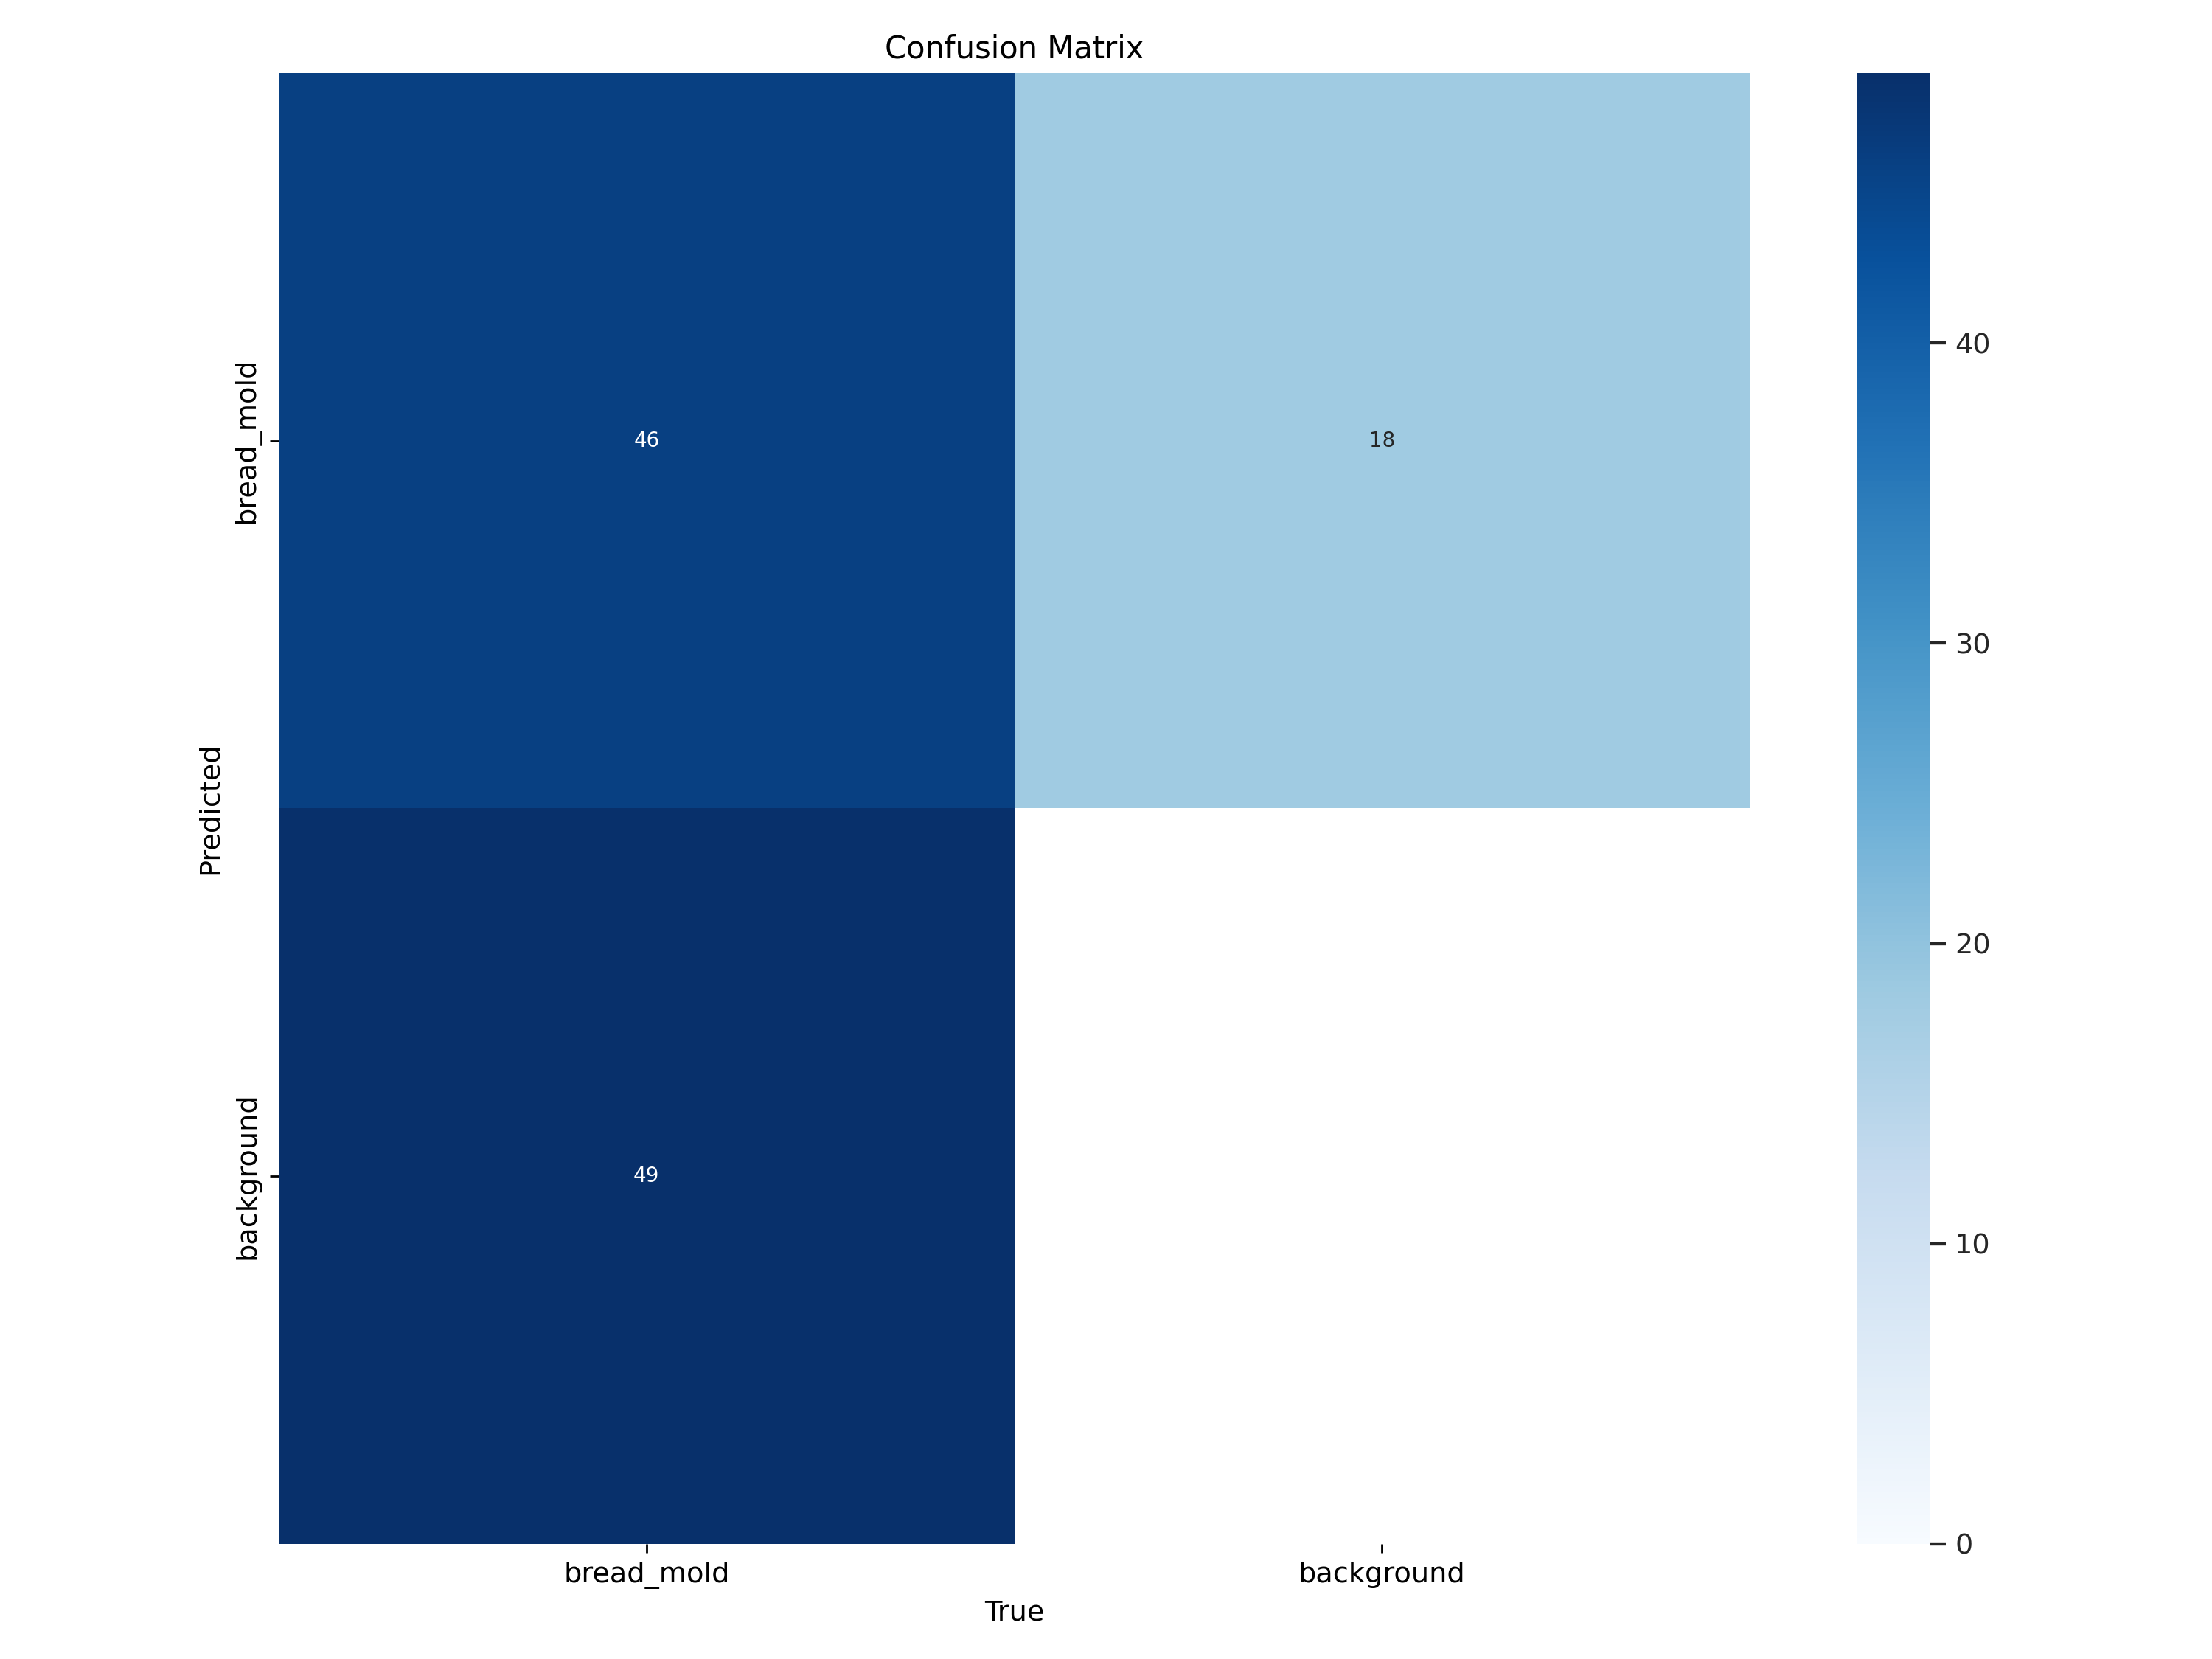

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

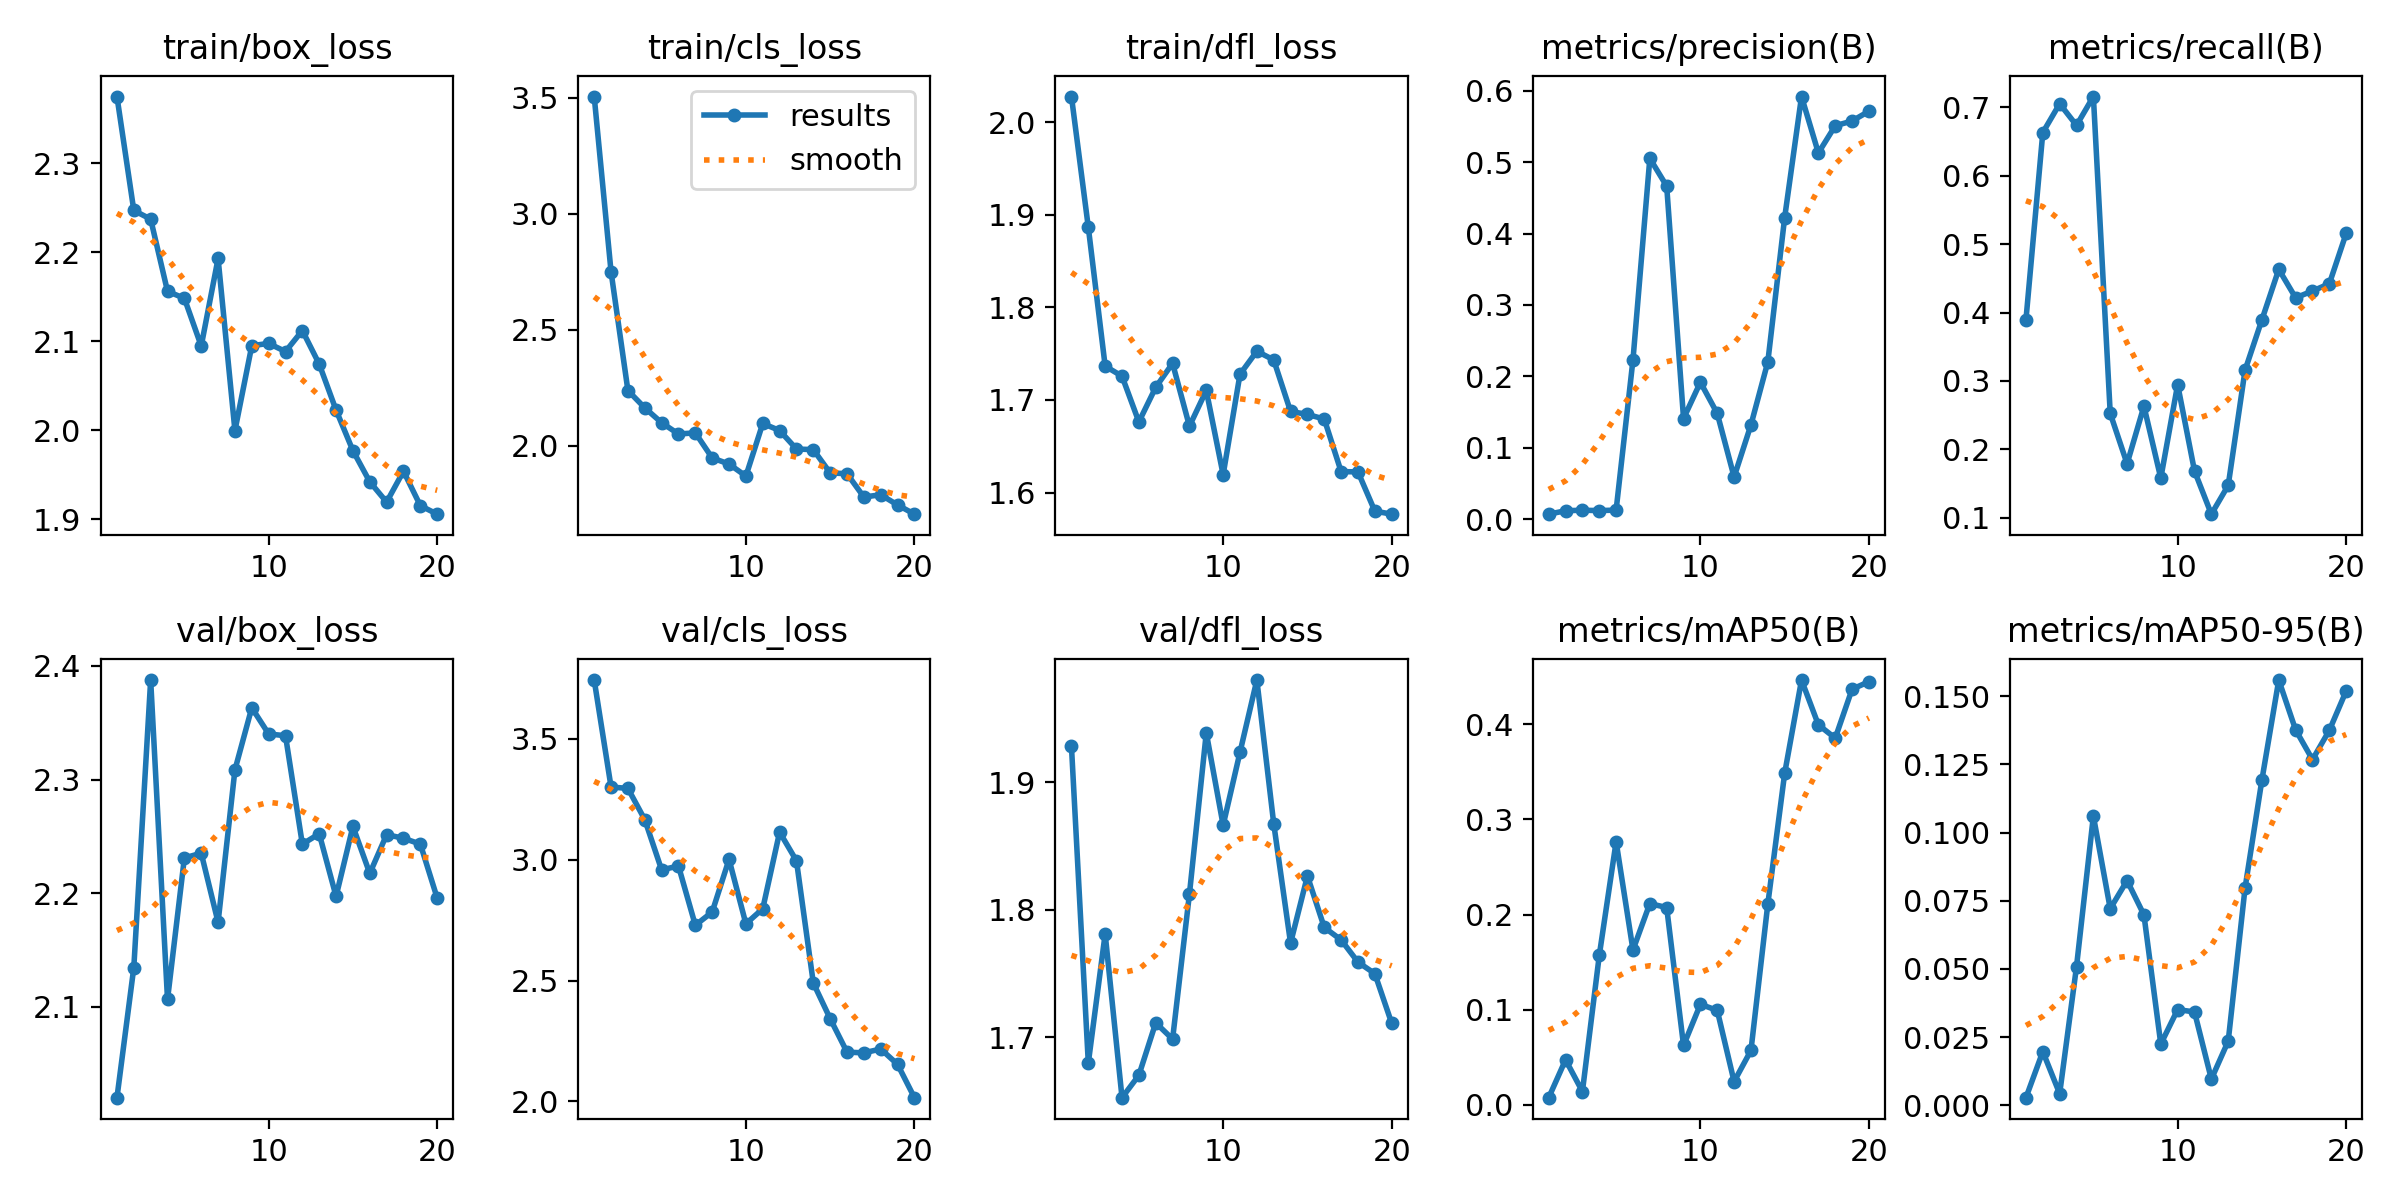

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

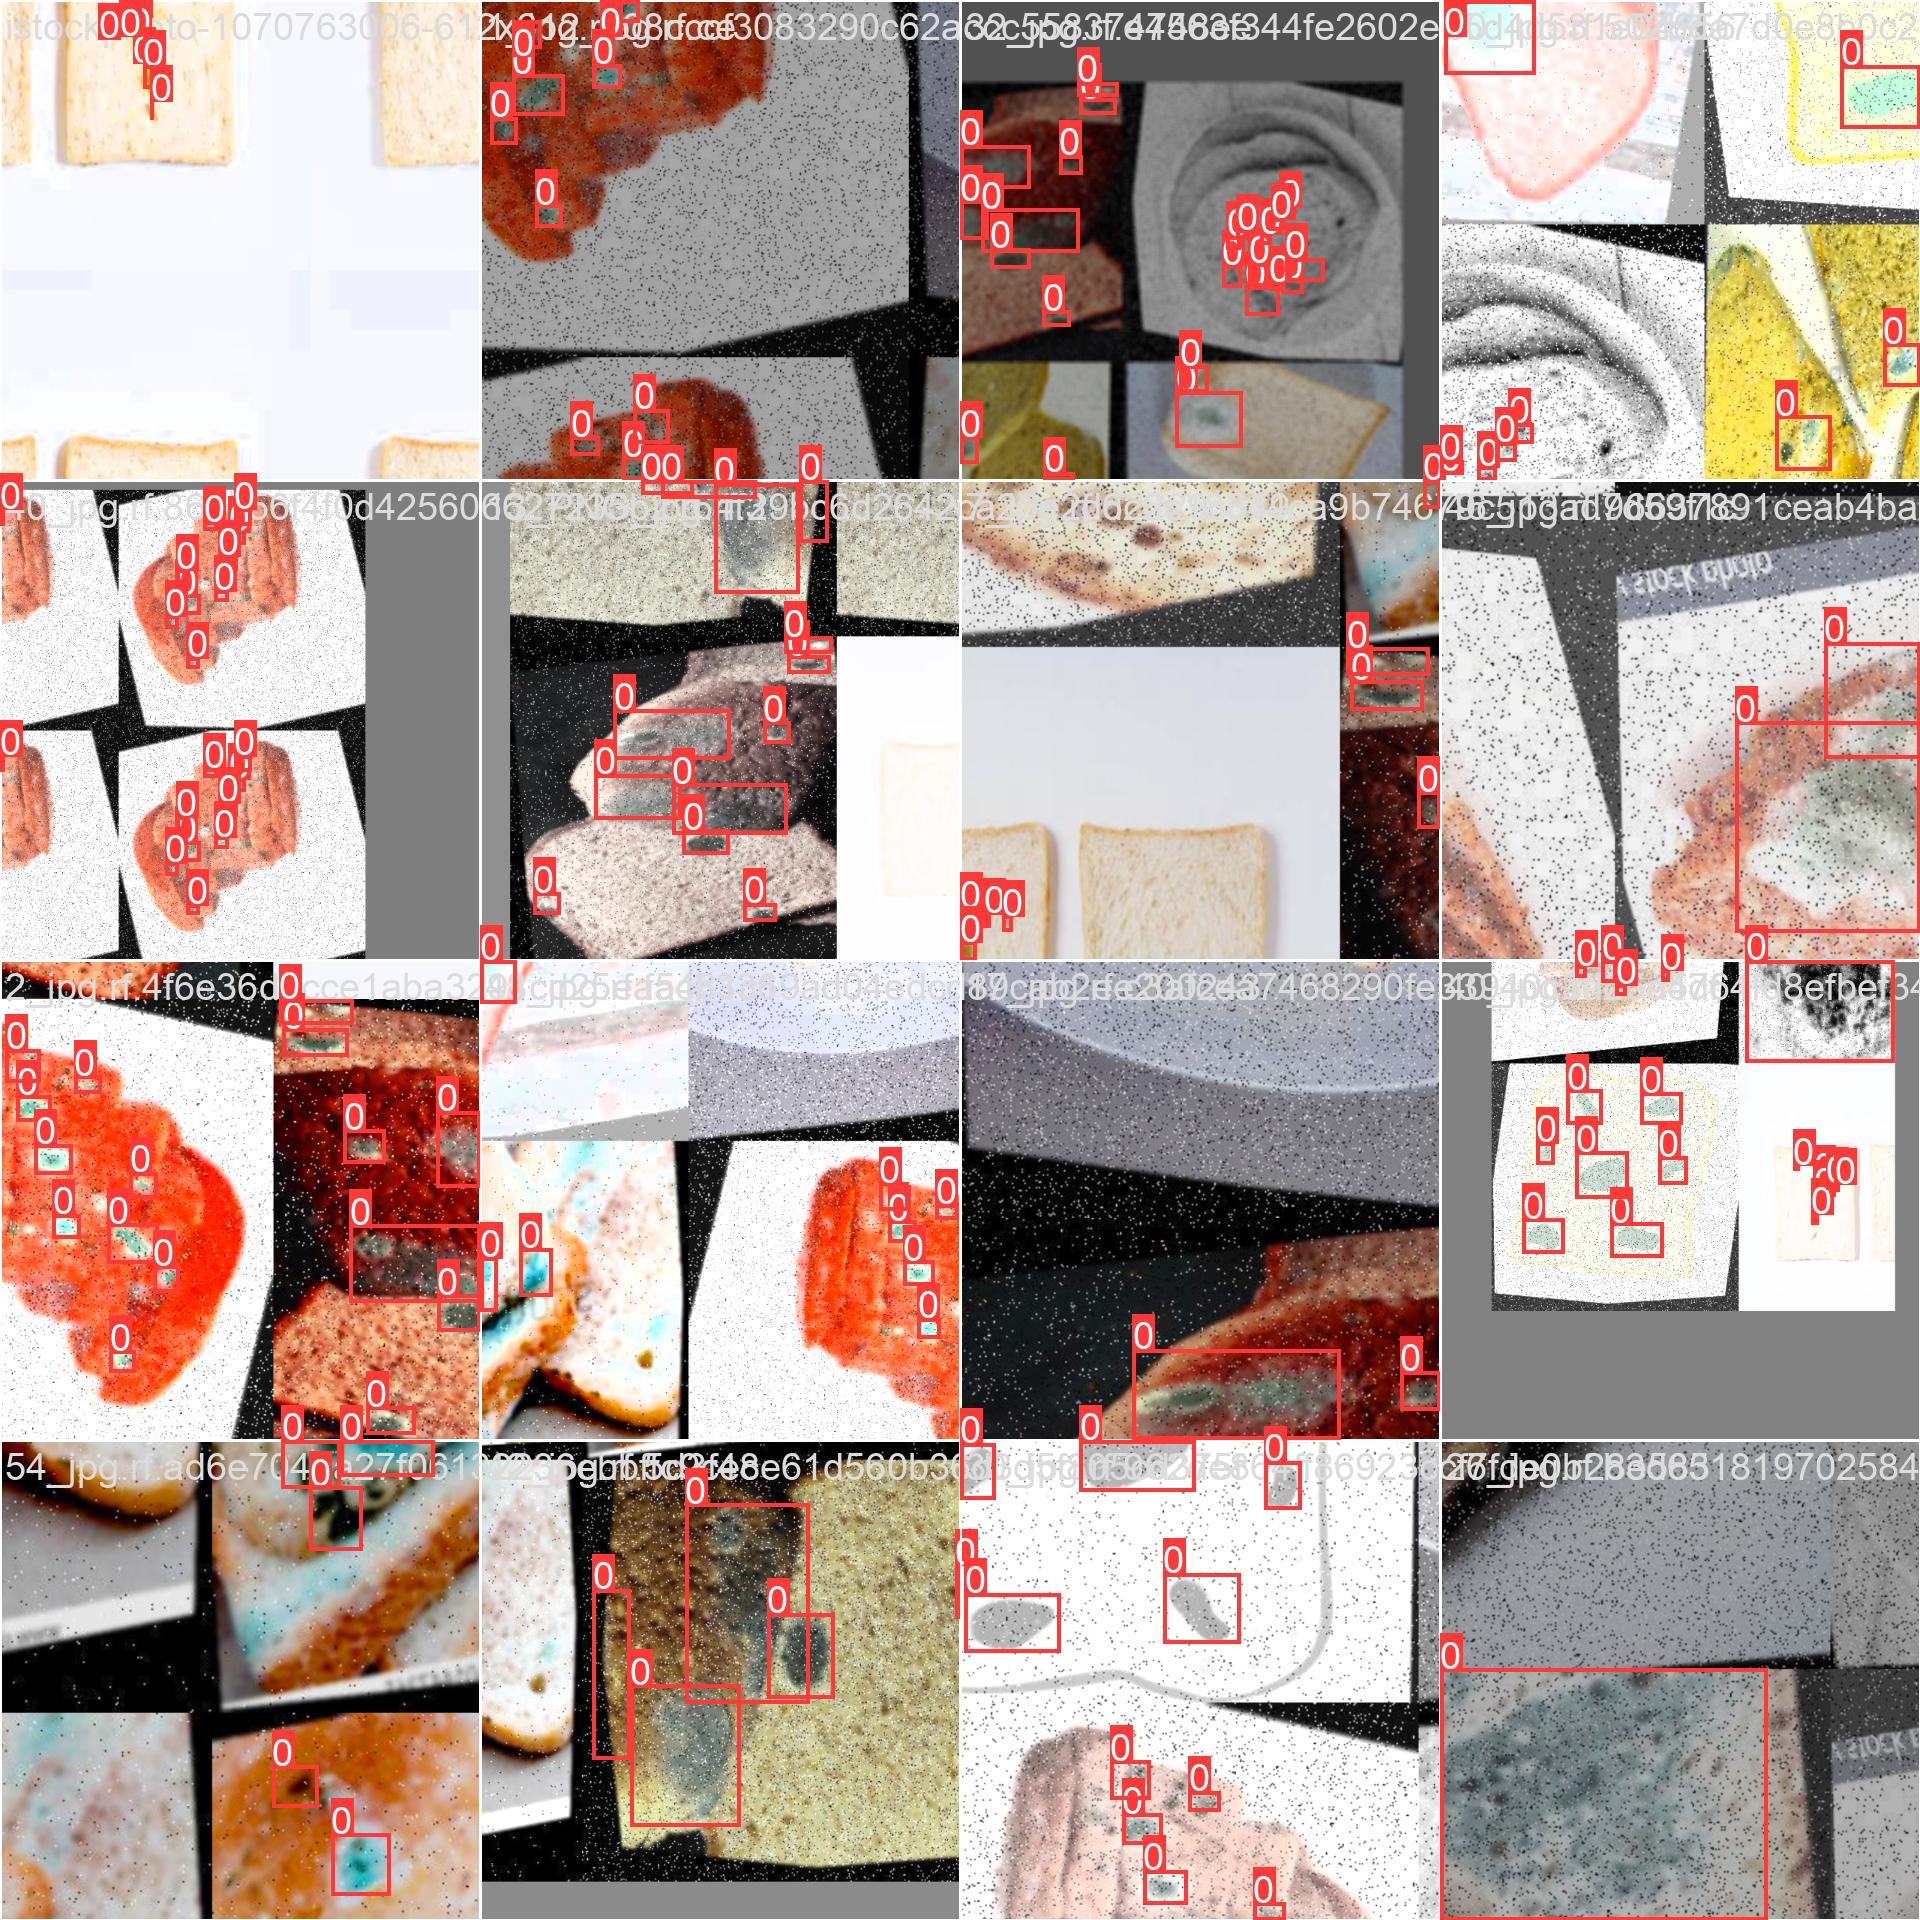

In [ ]:
Image(filename=f'/content/runs/detect/train2/train_batch0.jpg', width=600)

## Validate Custome Model

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/mold-1/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:07<00:00,  3.51s/it]
                   all         18         95      0.592      0.463      0.446      0.156
Speed: 5.9ms preprocess, 331.1ms inference, 0.0ms loss, 38.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


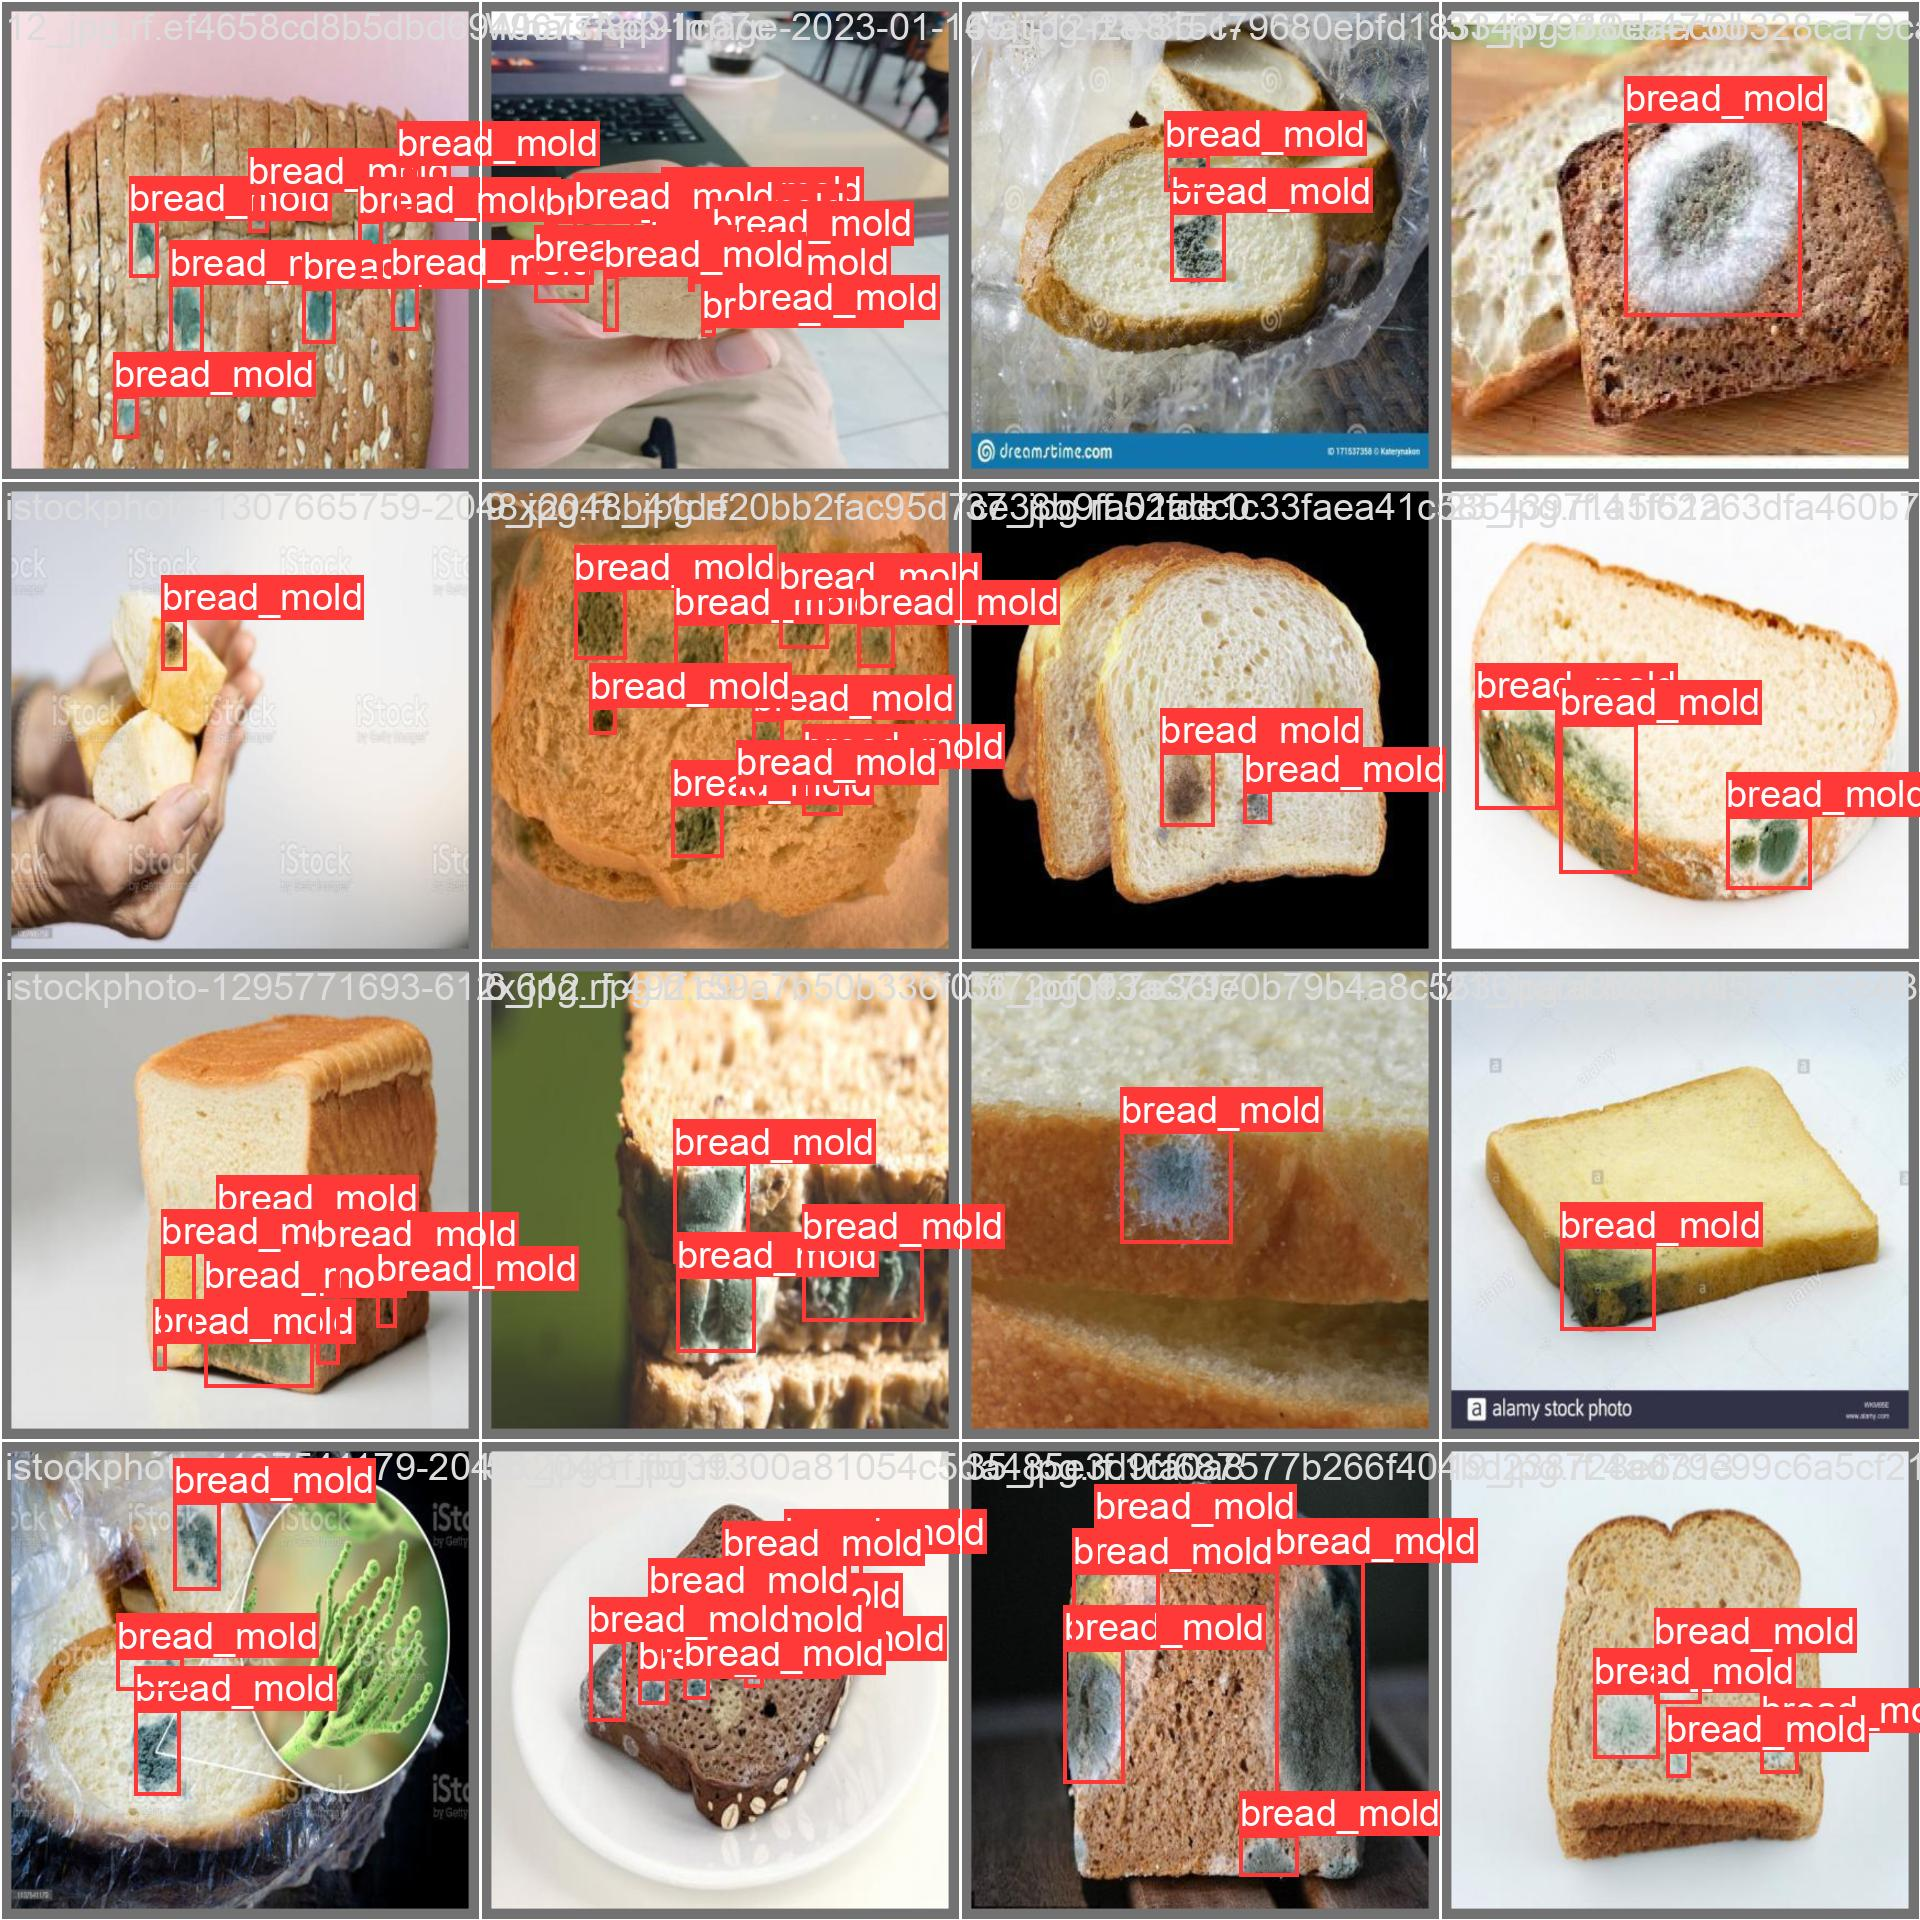

In [ ]:
Image(filename=f'/content/runs/detect/train2/val_batch0_labels.jpg', width=600)

### Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/17 /content/mold-1/test/images/063037_thinkstockphotos178390807_jpg.rf.dddb8b9fb3749094f3d8686e9ae97c45.jpg: 640x640 2 bread_molds, 524.4ms
image 2/17 /content/mold-1/test/images/28_jpg.rf.f93abae2ec2cc3e393ea2def85307ea0.jpg: 640x640 3 bread_molds, 329.2ms
image 3/17 /content/mold-1/test/images/34_jpg.rf.0bb1aff918d4d34fef63243d260e9111.jpg: 640x640 4 bread_molds, 301.2ms
image 4/17 /content/mold-1/test/images/43_jpg.rf.69880a67c859ef4937e50a4419712993.jpg: 640x640 2 bread_molds, 320.2ms
image 5/17 /content/mold-1/test/images/52_jpg.rf.ef1df3eeb675d71aa396f4527c95ed9f.jpg: 640x640 1 bread_mold, 314.8ms
image 6/17 /content/mold-1/test/images/8_jpg.rf.4ae8280eae941c26e499c8ca3c6180ee.jpg: 640x640 5 bread_molds, 317.8ms
image 7/17 /content/mold-1/test/images/istockphoto-1225775824-612x612_jpg.rf.e889c1545528215435473171526b903d.j

In [ ]:
!yolo task=segment mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true


WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.187 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/17 /content/mold-1/test/images/063037_thinkstockphotos178390807_jpg.rf.dddb8b9fb3749094f3d8686e9ae97c45.jpg: 640x640 2 bread_molds, 255.8ms
image 2/17 /content/mold-1/test/images/28_jpg.rf.f93abae2ec2cc3e393ea2def85307ea0.jpg: 640x640 3 bread_molds, 179.8ms
image 3/17 /content/mold-1/test/images/34_jpg.rf.0bb1aff918d4d34fef63243d260e9111.jpg: 640x640 4 bread_molds, 191.3ms
image 4/17 /content/mold-1/test/images/43_jpg.rf.69880a67c859ef4937e50a4419712993.jpg: 640x640 2 bread_molds, 193.9ms
image 5/17 /content/mold-1/test/images/52_jpg.rf.ef1df3eeb675d71aa396f4527c95ed9f.jpg: 640x640 1 bread_mold, 190.6ms
image 6/17 /content/mold-1/test/images/8_jpg.rf.4ae8280eae941c26e499c8ca3c6180ee.jpg: 6

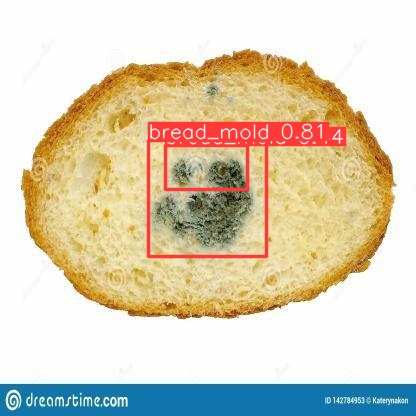

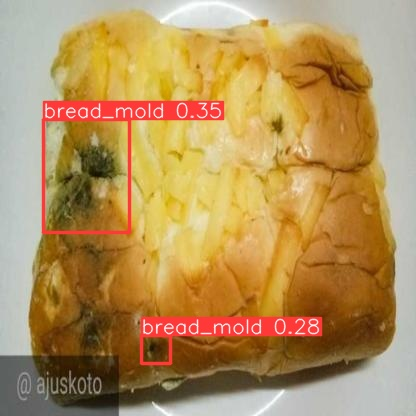

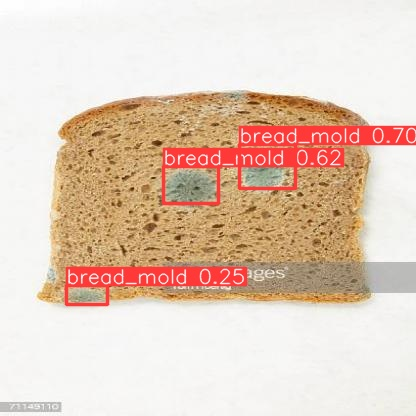

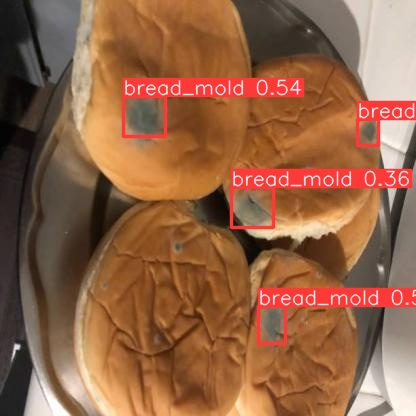

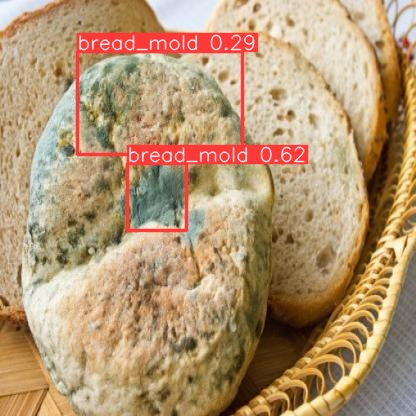

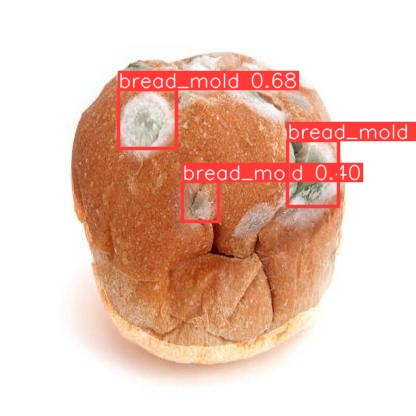

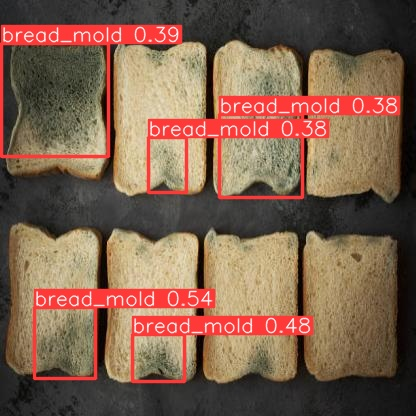

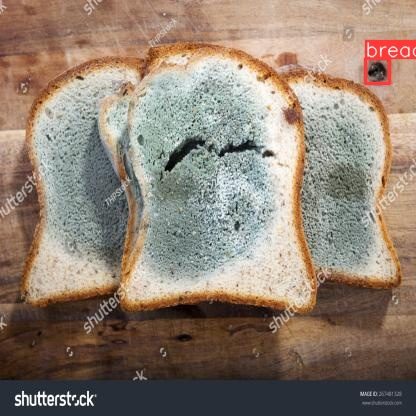

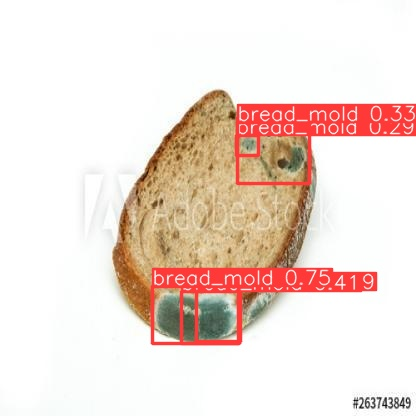

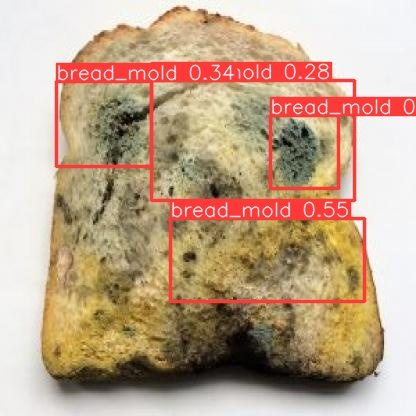

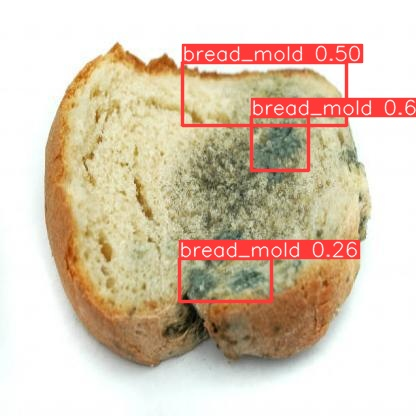

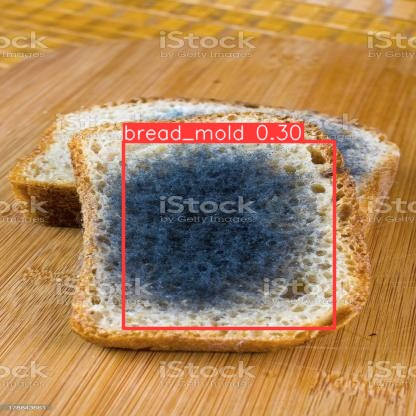

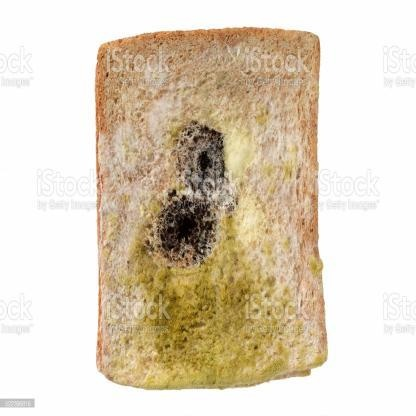

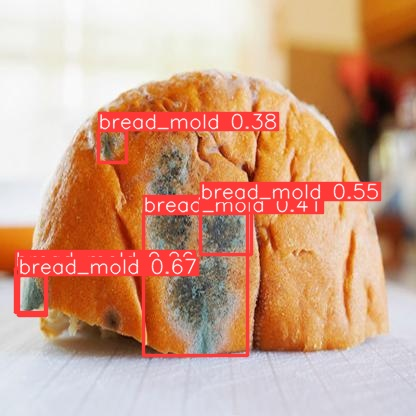

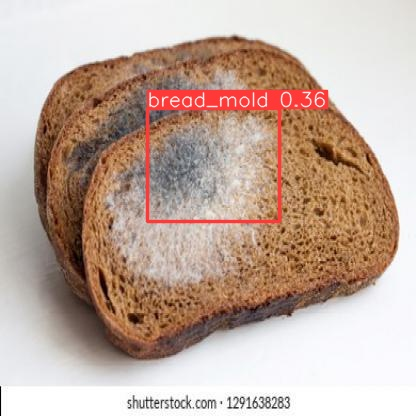

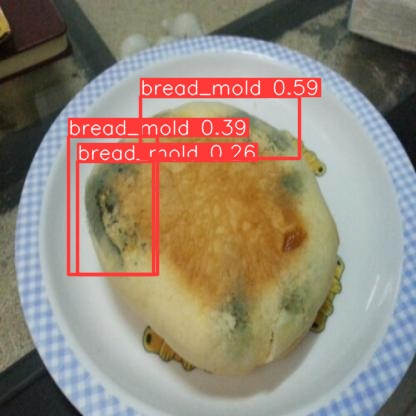

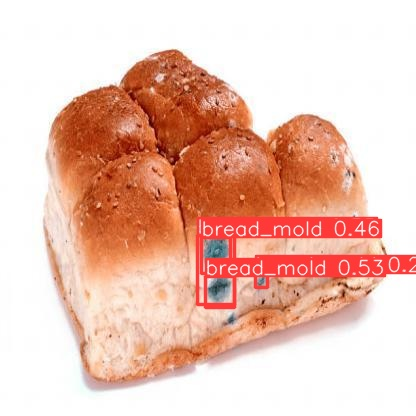

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, width=400))
      print("\n")